# This analysis entails analyzing the data of crimes committed in Los Angeles (USA). The data will be analyzed to find out where crime is most committed, then, the most committed crime, the gender of the victim, amongst other things.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
crime = pd.read_csv('C:/Users/hp/Downloads/crime_in_la.csv')
crime.head(5)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [2]:
#To rename some columns in the dataset
crime.rename(columns={'DATE OCC': "DateofCrime", 'Crm Cd Desc':'Crime_Desc', 'TIME OCC':'TimeOfCrime', 'Vict Descent':'Vict_race', 'Vict Sex':'Vict_sex'}, inplace=True)

In [3]:
#Conversion of the date object data type to datetime object
crime['DateofCrime'] = pd.to_datetime(crime['DateofCrime'])
crime.head(6)

,DR_NO,DateofCrime,TimeOfCrime,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crime_Desc,Mocodes,Vict Age,Vict_sex,Vict_race,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-08-01,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,2020-01-01,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,2020-01-01,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,2020-01-01,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
5,200100502,2020-02-01,13:15,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,23,M,H,DEPARTMENT STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S FIGUEROA ST,34.0483,-118.2631


In [4]:
crime.head(4)

,DR_NO,DateofCrime,TimeOfCrime,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crime_Desc,Mocodes,Vict Age,Vict_sex,Vict_race,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-08-01,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,2020-01-01,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,2020-01-01,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


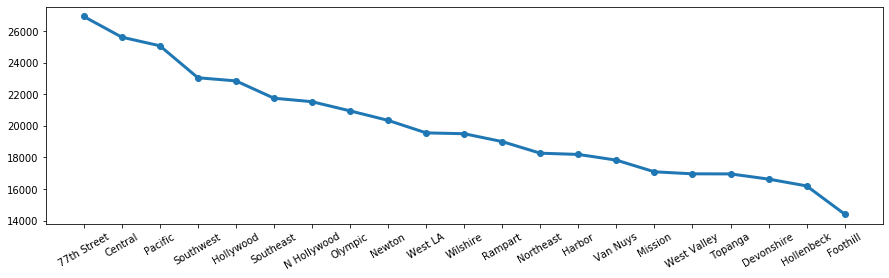

In [5]:
#Finding out which area in LA has the high number of crimes and plotting a line graph
crime_area = crime['AREA NAME'].value_counts()
plt.figure(figsize=(15,4))
plt.plot(crime_area, linewidth= 3, marker='o')
plt.xticks(rotation=30)
plt.show()

In [6]:
#what time was most of the crimes committed
crime_time = crime['TimeOfCrime'].value_counts()
crime_time


12:00    15074
18:00    11763
17:00    11119
20:00    11016
19:00    10156
         ...  
05:34        6
05:44        6
08:41        5
06:42        4
07:57        4
Name: TimeOfCrime, Length: 1439, dtype: int64

In [30]:
#statistics of the types of crimes committed
crime_type = crime['Crime_Desc'].value_counts()
crime_type

VEHICLE - STOLEN                                           46185
BATTERY - SIMPLE ASSAULT                                   33754
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    27448
BURGLARY FROM VEHICLE                                      27279
BURGLARY                                                   25886
                                                           ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)             2
FAILURE TO DISPERSE                                            2
PICKPOCKET, ATTEMPT                                            2
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)                   2
GRAND THEFT / AUTO REPAIR                                      1
Name: Crime_Desc, Length: 135, dtype: int64

In [9]:
#Focusing on battery/Assault crimes
batt = crime[crime['Crime_Desc'] == "BATTERY - SIMPLE ASSAULT"]
batt

,DR_NO,DateofCrime,TimeOfCrime,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crime_Desc,Mocodes,Vict Age,Vict_sex,Vict_race,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-08-01,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-01,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
49,200104054,2020-01-01,23:30,1,Central,135,624,BATTERY - SIMPLE ASSAULT,0416 1266 2004,28,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,WALL,34.0495,-118.2458
51,200104058,2020-01-01,19:40,1,Central,135,624,BATTERY - SIMPLE ASSAULT,1218 1822 0416 2034 0371,46,M,H,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,LOS ANGELES ST,34.0485,-118.2447
52,200104060,2020-01-01,18:00,1,Central,153,624,BATTERY - SIMPLE ASSAULT,0416 1822 2004,56,F,O,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,600 S SPRING ST,34.0467,-118.2520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418468,221504243,2022-06-01,13:00,15,N Hollywood,1548,624,BATTERY - SIMPLE ASSAULT,0416,75,M,W,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,LANKERSHIM BL,34.1670,-118.3762
418510,220904213,2022-06-01,21:35,9,Van Nuys,914,624,BATTERY - SIMPLE ASSAULT,0416,52,M,H,MARKET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,7100 N SEPULVEDA BL,34.1993,-118.4662
418567,222004553,2022-01-15,19:35,20,Olympic,2027,624,BATTERY - SIMPLE ASSAULT,0342 0416 0446 1266 1309 1313 1822,28,M,H,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,WILSHIRE,34.0618,-118.2979
418576,222004405,2022-07-01,00:10,20,Olympic,2074,624,BATTERY - SIMPLE ASSAULT,2038 1202 0360 0400 0416 2002,61,M,H,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1500 S ARDMORE AV,34.0449,-118.3025


In [10]:
#Which areas reported the most cases of battery/assault
location_batt = batt['AREA NAME'].value_counts()
location_batt

Central        2898
Southwest      2119
77th Street    2057
Olympic        2054
Hollywood      1976
Rampart        1883
Newton         1851
Southeast      1781
N Hollywood    1588
Pacific        1531
Hollenbeck     1506
Harbor         1491
Wilshire       1435
West LA        1395
Van Nuys       1292
Topanga        1231
Northeast      1170
Devonshire     1142
Mission        1127
West Valley    1120
Foothill       1107
Name: AREA NAME, dtype: int64

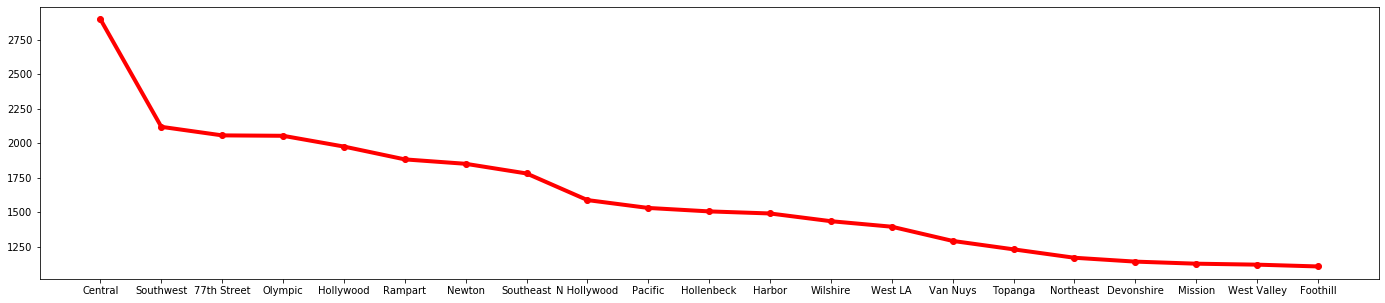

In [31]:
#A plot of the areas where battery/assault were reported
plt.figure(figsize=(24,5))
plt.plot(location_batt, linewidth=4, color='red', marker='o')
plt.show()

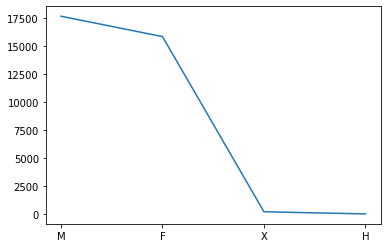

In [32]:
#Statistics of the gender of the victims
batt_gender = batt['Vict_sex'].value_counts()
plt.plot(batt_gender)
plt.show()

In [24]:
#Time of Battery and Assault Crimes
batt_time = batt['TimeOfCrime'].value_counts()
batt_time

17:00    646
12:00    624
18:00    611
15:00    593
13:00    591
        ... 
22:11      1
04:07      1
10:18      1
00:28      1
16:33      1
Name: TimeOfCrime, Length: 972, dtype: int64

In [14]:
batt_central = batt[batt['AREA NAME'] == 'Central']
batt_central.head()

,DR_NO,DateofCrime,TimeOfCrime,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crime_Desc,Mocodes,Vict Age,Vict_sex,Vict_race,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
1,190101086,2020-01-01,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
49,200104054,2020-01-01,23:30,1,Central,135,624,BATTERY - SIMPLE ASSAULT,0416 1266 2004,28,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,WALL,34.0495,-118.2458
51,200104058,2020-01-01,19:40,1,Central,135,624,BATTERY - SIMPLE ASSAULT,1218 1822 0416 2034 0371,46,M,H,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,LOS ANGELES ST,34.0485,-118.2447
52,200104060,2020-01-01,18:00,1,Central,153,624,BATTERY - SIMPLE ASSAULT,0416 1822 2004,56,F,O,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,600 S SPRING ST,34.0467,-118.2520
64,200104082,2020-02-01,12:25,1,Central,153,624,BATTERY - SIMPLE ASSAULT,0416,60,M,O,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,7TH,34.0449,-118.2528


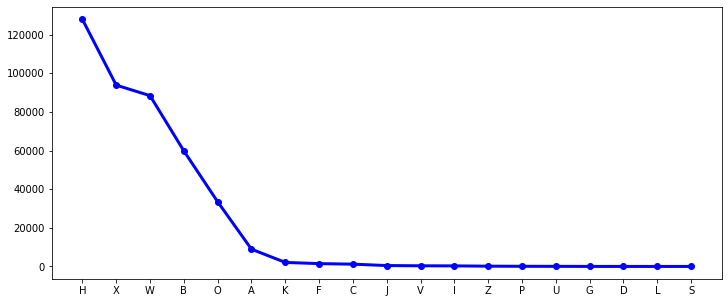

In [36]:
#A plot of the race of crime victims in LA
race = crime['Vict_race'].value_counts()
plt.figure(figsize=(12,5))
plt.plot(race, linewidth=3, color='blue', marker='o')
plt.show()

In [19]:
#To analyze the data of vehicle theft crimes in LA
veh_theft = crime[crime['Crime_Desc'] == 'VEHICLE - STOLEN']
veh_theft

,DR_NO,DateofCrime,TimeOfCrime,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crime_Desc,Mocodes,Vict Age,Vict_sex,Vict_race,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
19,200505212,2020-01-26,12:00,5,Harbor,529,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,E,33.7753,-118.2456
22,200117988,2020-03-09,20:00,1,Central,111,510,VEHICLE - STOLEN,0,0,X,X,GARAGE/CARPORT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,500 N FIGUEROA ST,34.0615,-118.2470
27,200104411,2020-06-01,23:00,1,Central,182,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S GRAND AV,34.0430,-118.2606
54,200104577,2020-08-01,19:00,1,Central,192,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,VENICE,34.0372,-118.2694
59,200104073,2020-02-01,03:45,1,Central,143,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,400 S SPRING ST,34.0488,-118.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418585,221004450,2022-12-01,18:30,10,West Valley,1027,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,6800 LOUISE AV,34.1939,-118.5098
418589,221204674,2022-12-01,18:00,12,77th Street,1266,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,81ST ST,33.9655,-118.2916
418593,220504578,2022-01-17,22:30,5,Harbor,508,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,23200 S WESTERN AV,33.8163,-118.3088
418595,220604449,2022-11-01,22:00,6,Hollywood,636,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1800 GRACE AV,34.1039,-118.3318


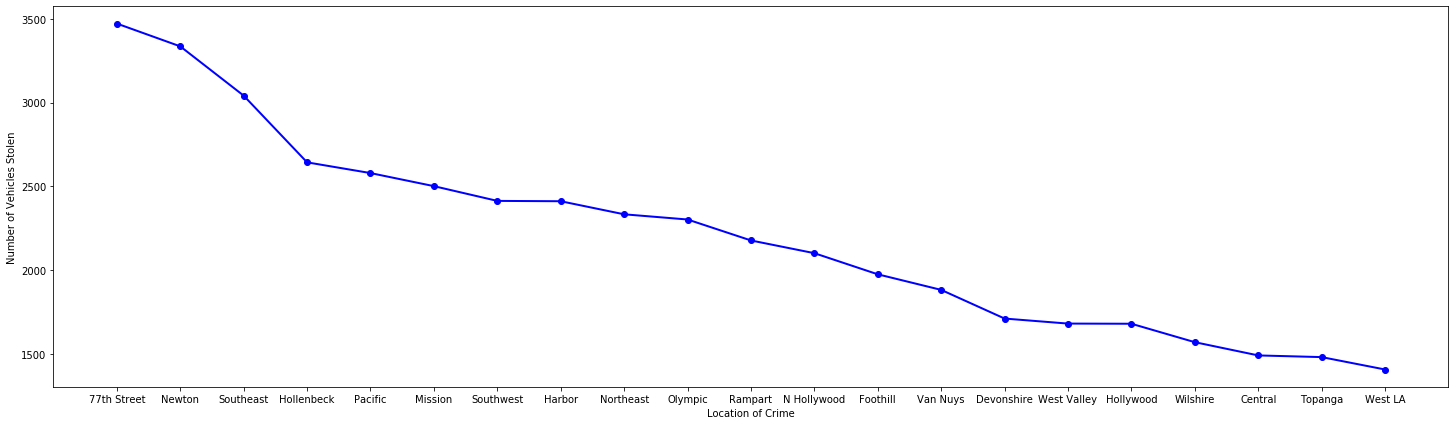

In [20]:
#Statistics and line plot of areas were vehicle theft were most reported
loc_vehTheft = veh_theft['AREA NAME'].value_counts()
plt.figure(figsize=(25,7))
plt.plot(loc_vehTheft, linewidth= 2, marker = 'o', color='blue')
plt.xlabel('Location of Crime')
plt.ylabel('Number of Vehicles Stolen')
plt.show()

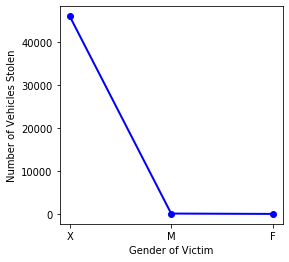

In [21]:
#Victimes of vehicle theft
scene_ofTheft = veh_theft['Vict_sex'].value_counts()
plt.figure(figsize=(4,4))
plt.plot(scene_ofTheft, linewidth= 2, marker = 'o', color='blue')
plt.xlabel('Gender of Victim')
plt.ylabel('Number of Vehicles Stolen')
plt.show()

In [29]:
#TIME OF most Vehicle theft
theft_time = veh_theft['TimeOfCrime'].value_counts()